# Gaussian Process Regression with Scikit-Learn

Roberto Toro, February 2017

In [125]:
%pylab inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

Populating the interactive namespace from numpy and matplotlib


In [108]:
np.random.seed(1)

In [109]:
def myf(x):
    """The function to predict."""
    return x * np.sin(x)

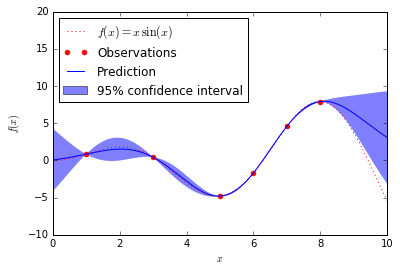

In [110]:
# ----------------------------------------------------------------------
#  Noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = myf(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instanciate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on the MSE
fig = plt.figure()
plt.plot(x, myf(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

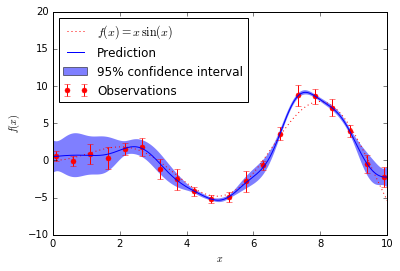

In [111]:
# ----------------------------------------------------------------------
# Noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = myf(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instanciate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=(dy / y) ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on the MSE
fig = plt.figure()
plt.plot(x, myf(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

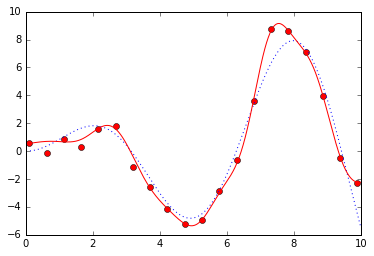

In [112]:
plt.plot(X,y,'ro')
plt.plot(x,myf(x),'b:')
plt.plot(x,y_pred,'r-')

In [135]:
# Brain imaging case (RDB data)
url = 'https://rawgit.com/r03ert0/tsne-rdb/master/rdb723.csv'
brain_data = pd.read_csv(url).dropna(axis=0).sort_values(by="AGE_at_scan")

In [155]:
x=brain_data.AGE_at_scan.ravel().reshape(-1, 1)
y=brain_data.EstimatedTotalIntraCranialVol.ravel().reshape(-1, 1)

In [158]:
kernel = 1.0 * RBF(100, (1e-2, 1e7))
#kernel = 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1)
gp.fit(x, y)
y_pred, sigma = gp.predict(x, return_std=True)

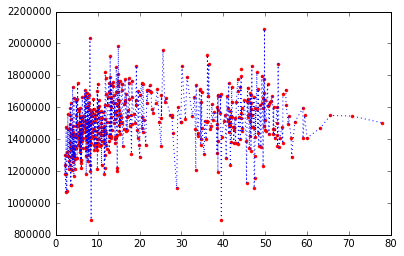

In [159]:
plt.plot(x,y,'r.')
plt.plot(x,y_pred,'b:')